In [1]:
from tensorflow import keras

In [3]:
# Load IMDB dataset with top 10,000 most frequent words only
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# Print shape
print("Training samples:", len(x_train))
print("Test samples:", len(x_test))

Training samples: 25000
Test samples: 25000


In [5]:
#Get the word index mapping
word_index = keras.datasets.imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
# Decode first review
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in x_train[0]])
print(decoded_review)
print("Label:", y_train[0])

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(x_train, maxlen=256)
x_test = pad_sequences(x_test, maxlen=256)

In [11]:
model = keras.models.Sequential([
    keras.layers.Embedding(input_dim=10000, output_dim=32, input_length=256),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')   # binary classification
])

/Users/mahesyoga/tf-arm-venv/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

2025-05-16 07:16:04.406469: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-05-16 07:16:04.406785: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-05-16 07:16:04.406812: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-05-16 07:16:04.407138: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-16 07:16:04.407184: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [14]:
history = model.fit(x_train, y_train,
                   epochs=10,
                   batch_size=512,
                   validation_split=0.2)

Epoch 1/10


2025-05-16 07:39:26.725711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 440ms/step - accuracy: 0.5588 - loss: 0.6911 - val_accuracy: 0.6154 - val_loss: 0.6766
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 487ms/step - accuracy: 0.6610 - loss: 0.6661 - val_accuracy: 0.7258 - val_loss: 0.6210
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 466ms/step - accuracy: 0.7552 - loss: 0.6008 - val_accuracy: 0.7910 - val_loss: 0.5352
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 468ms/step - accuracy: 0.8031 - loss: 0.5130 - val_accuracy: 0.8300 - val_loss: 0.4556
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 468ms/step - accuracy: 0.8471 - loss: 0.4291 - val_accuracy: 0.8406 - val_loss: 0.4034
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 466ms/step - accuracy: 0.8475 - loss: 0.3805 - val_accuracy: 0.8466 - val_loss: 0.3722
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 452ms/step - accuracy: 0.8789 - loss: 0.3321 - val_accuracy: 0.8614 - val_loss: 0.3448
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 458ms/step - accuracy: 0.8848 - loss: 0.3096 - val_accuracy: 0.866

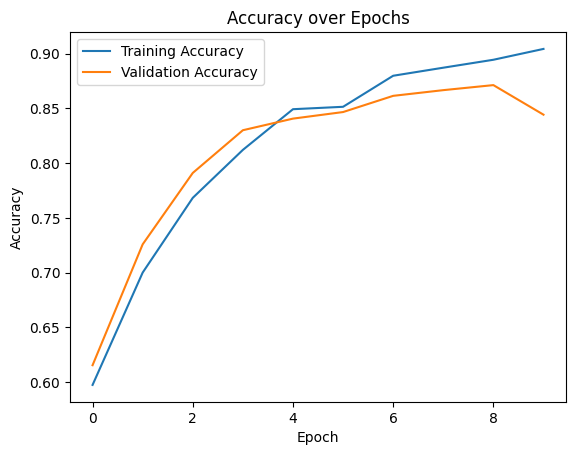

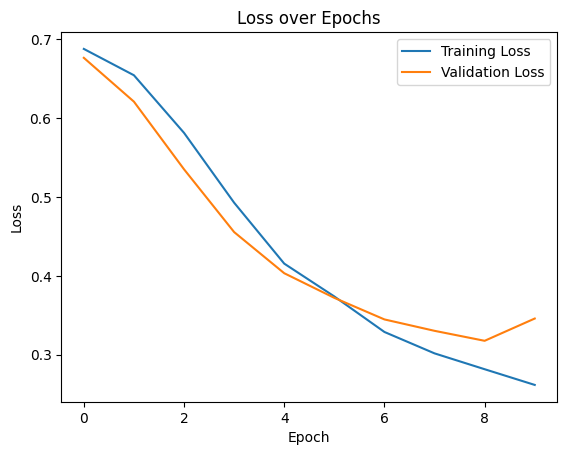

In [15]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()